In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error as MSE

In [3]:
df = pd.read_csv('training_data.csv')

In [4]:
df.shape

(29709, 10)

In [5]:
df.head(10)

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,3545,3.2375,5.0,6.028881,1.051118,4660.0,2.717201,38.10,-122.14,1.92400
1,36760,4.5500,18.0,6.091451,1.030581,1623.0,3.330014,34.37,-118.52,1.99100
2,29301,6.0743,16.0,6.394805,1.027350,1574.0,3.091451,34.11,-117.80,2.61000
3,285,3.6875,15.0,5.164835,1.056911,616.0,2.737892,38.49,-122.59,1.91700
4,30757,6.1273,11.0,6.256544,1.029503,7777.0,2.383468,34.19,-118.64,2.91500
5,14596,7.8750,32.0,6.397590,1.057831,1041.0,2.518717,33.61,-117.96,5.00001
6,32542,2.5000,31.0,3.182109,1.000000,852.0,1.562033,37.73,-122.40,1.93800
7,5765,3.7252,31.0,4.642229,1.089781,1035.0,2.989781,34.02,-118.48,3.69400
8,6491,3.0393,16.0,5.212922,1.164859,591.0,2.356764,37.33,-120.83,1.29600
9,11683,3.2417,35.0,5.017021,0.985816,1048.0,2.273732,34.19,-118.58,2.02900


In [6]:
df.describe()

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,29709.000000,29709.000000,29709.000000,29709.000000,29709.000000,29709.000000,29709.000000,29709.000000,29709.000000,29709.000000
mean,18603.548016,3.854474,26.084856,5.165188,1.062142,1664.366523,2.833073,35.574937,-119.559416,2.077761
std,10733.967318,1.808813,12.162222,1.194982,0.096120,1311.036683,2.999188,2.083048,1.975349,1.157184
min,1.000000,0.499900,2.000000,0.851064,0.500000,3.000000,0.950000,32.550000,-124.350000,0.149990
25%,9310.000000,2.600000,17.000000,4.359797,1.020216,950.000000,2.392789,33.930000,-121.800000,1.206000
50%,18611.000000,3.517900,25.000000,5.070281,1.054475,1383.000000,2.744425,34.190000,-118.450000,1.807000
75%,27928.000000,4.700000,35.000000,5.865672,1.088657,1858.000000,3.122137,37.700000,-118.020000,2.660000
max,37136.000000,15.000100,52.000000,23.891566,5.873181,35682.000000,502.990610,41.950000,-114.550000,5.000010


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29709 entries, 0 to 29708
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           29709 non-null  int64  
 1   MedInc       29709 non-null  float64
 2   HouseAge     29709 non-null  float64
 3   AveRooms     29709 non-null  float64
 4   AveBedrms    29709 non-null  float64
 5   Population   29709 non-null  float64
 6   AveOccup     29709 non-null  float64
 7   Latitude     29709 non-null  float64
 8   Longitude    29709 non-null  float64
 9   MedHouseVal  29709 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 2.3 MB


In [8]:
df.isna().sum()

id             0
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [9]:
def diagnostic_plots(dataframe, col):

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(dataframe[col], bins=30)

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=dataframe[col])
    
    plt.show()

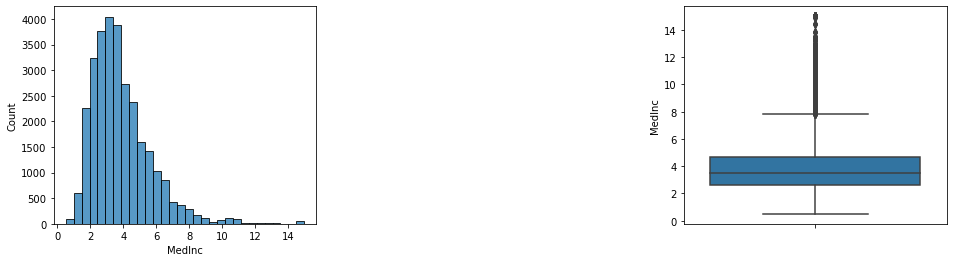

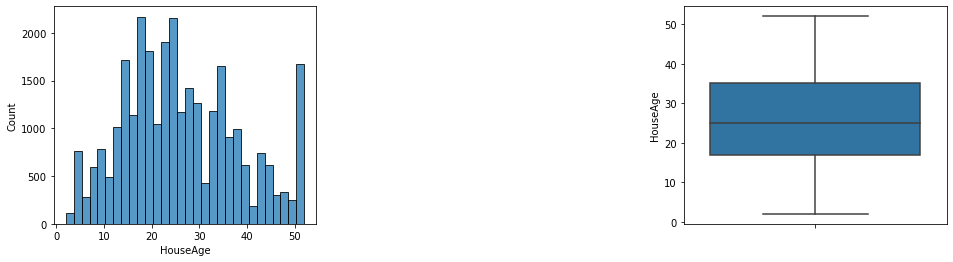

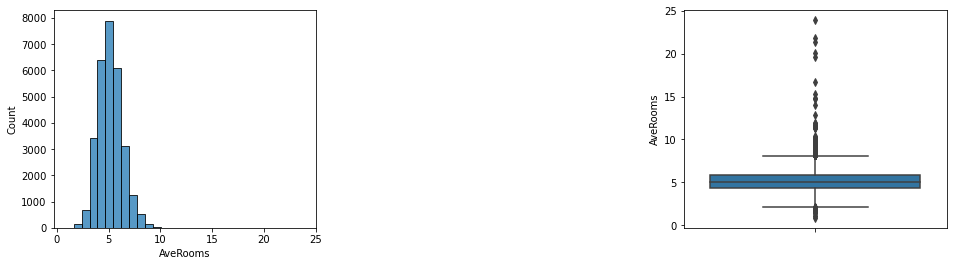

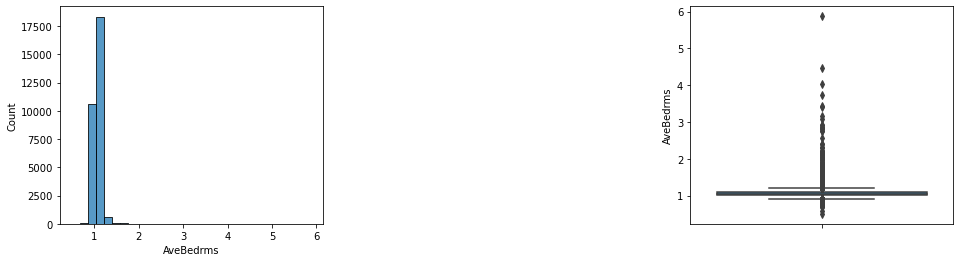

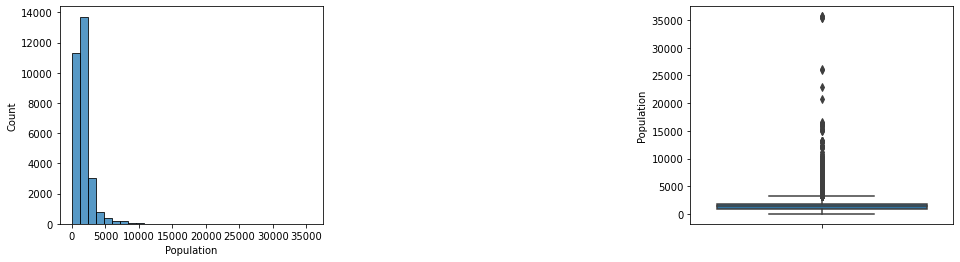

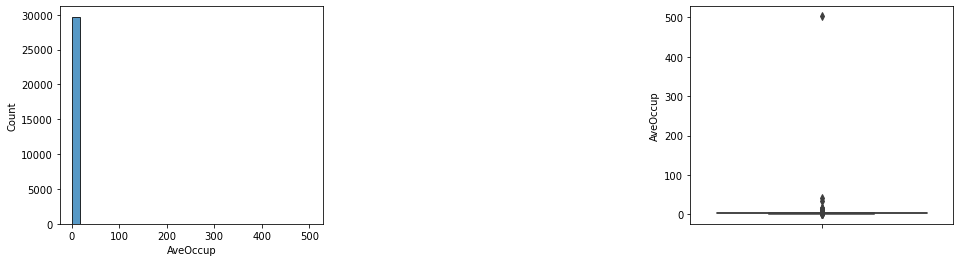

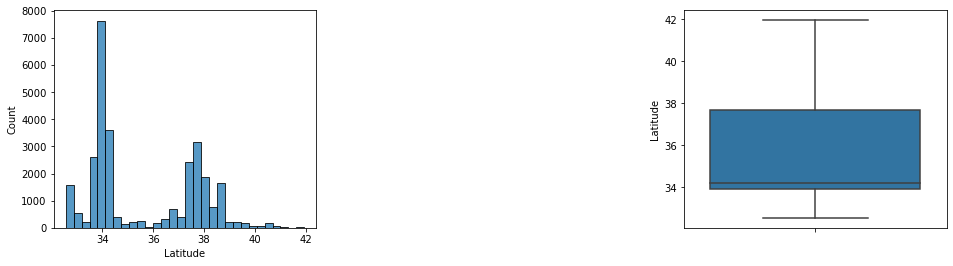

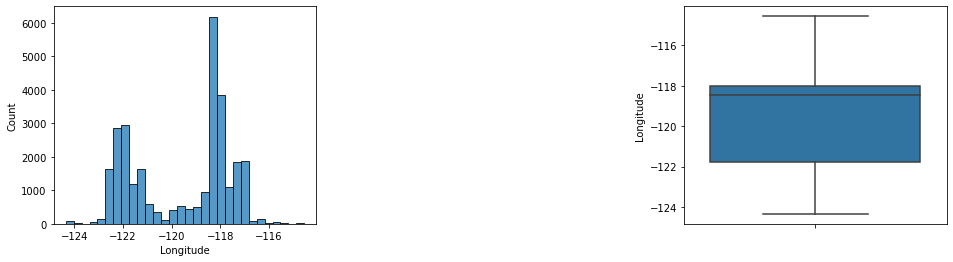

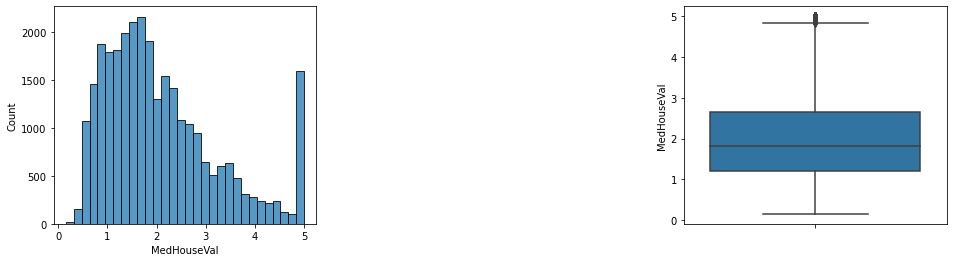

In [10]:
for col in ['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude','MedHouseVal']:
    diagnostic_plots(df, col)

In [11]:
def find_boundry(df,variable):
    Q1 =df[variable].quantile(.25)
    Q3 =df[variable].quantile(.75)
    IQR = Q3 - Q1
    lower_boundry = Q1 - 1.5*IQR
    upper_boundry = Q3 + 1.5*IQR
    
    return lower_boundry ,upper_boundry


def treat_outliers(df,variable):
    lower_boundry ,upper_boundry = find_boundry(df,variable)
    df[variable] = np.where(df[variable] > upper_boundry, upper_boundry, df[variable])
    df[variable] = np.where(df[variable] < lower_boundry, lower_boundry, df[variable])
    return df

In [12]:
treat_outliers(df,'AveOccup')
treat_outliers(df,'MedInc')
treat_outliers(df,'AveRooms')
treat_outliers(df,'AveBedrms')
treat_outliers(df,'Population')
treat_outliers(df,'MedHouseVal')

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,3545,3.2375,5.0,6.028881,1.051118,3220.0,2.717201,38.10,-122.14,1.924
1,36760,4.5500,18.0,6.091451,1.030581,1623.0,3.330014,34.37,-118.52,1.991
2,29301,6.0743,16.0,6.394805,1.027350,1574.0,3.091451,34.11,-117.80,2.610
3,285,3.6875,15.0,5.164835,1.056911,616.0,2.737892,38.49,-122.59,1.917
4,30757,6.1273,11.0,6.256544,1.029503,3220.0,2.383468,34.19,-118.64,2.915
...,...,...,...,...,...,...,...,...,...,...
29704,29280,4.6923,34.0,6.062972,1.091743,1198.0,2.746992,38.12,-122.17,1.617
29705,36351,3.1553,27.0,4.955882,1.002101,2048.0,2.433628,34.10,-117.18,1.516
29706,24915,2.4844,16.0,5.415350,1.069140,1446.0,3.050691,37.95,-121.31,1.143
29707,28148,5.1072,23.0,5.948012,1.003058,1497.0,3.111888,37.95,-121.98,2.213


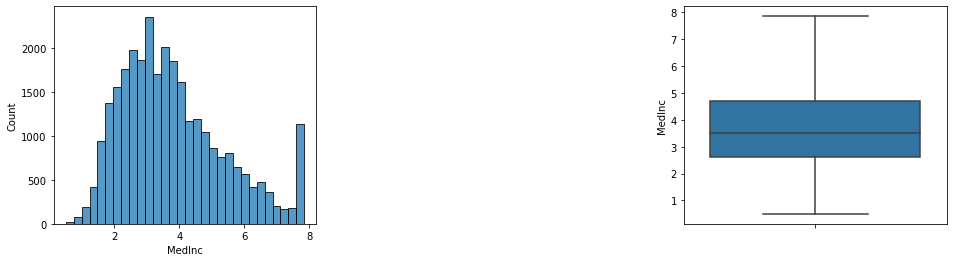

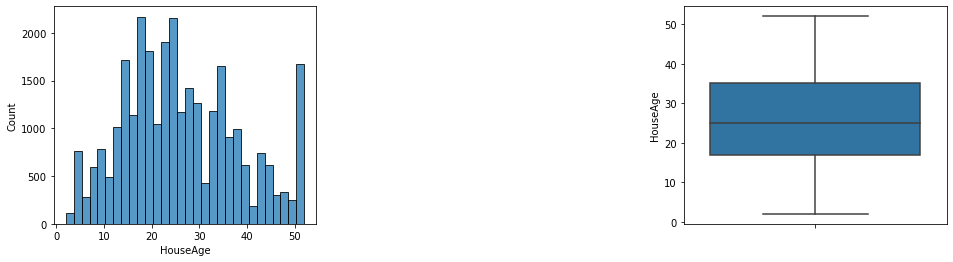

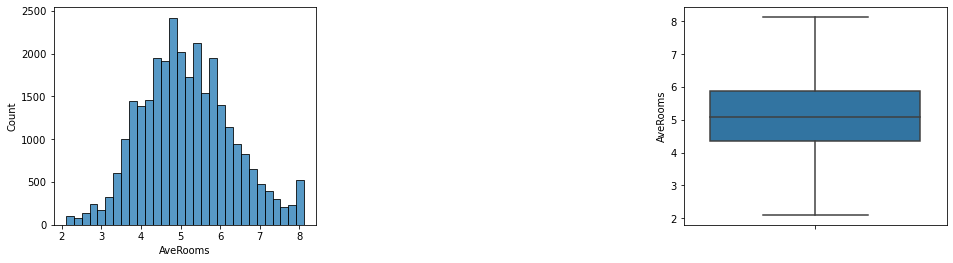

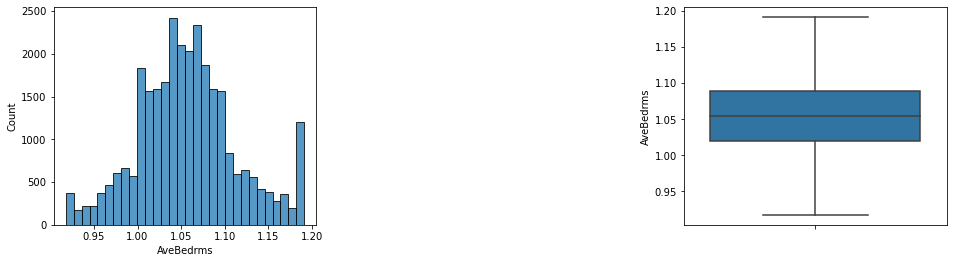

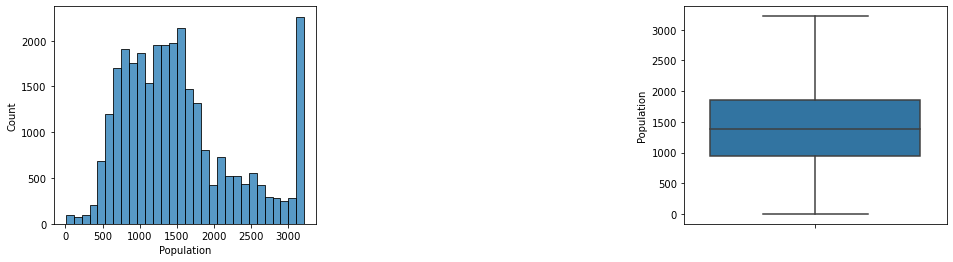

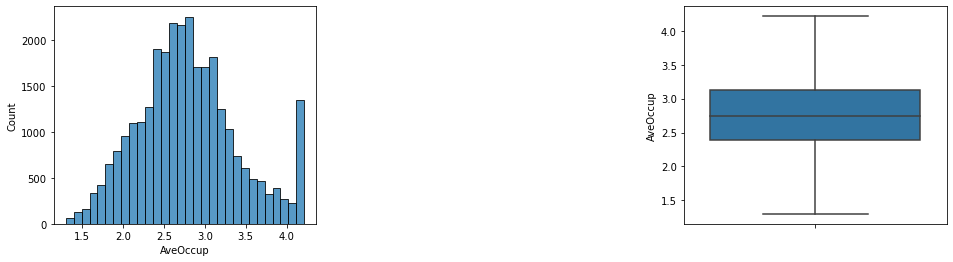

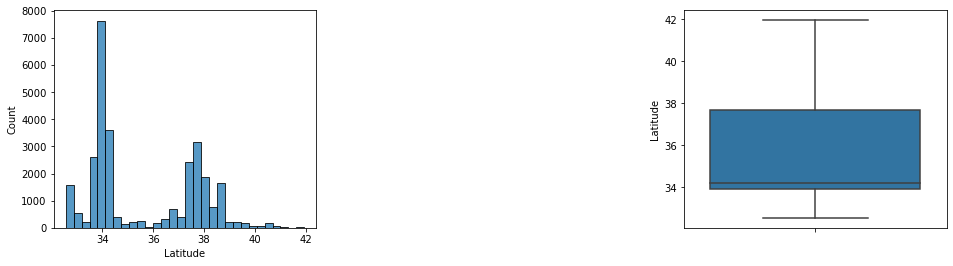

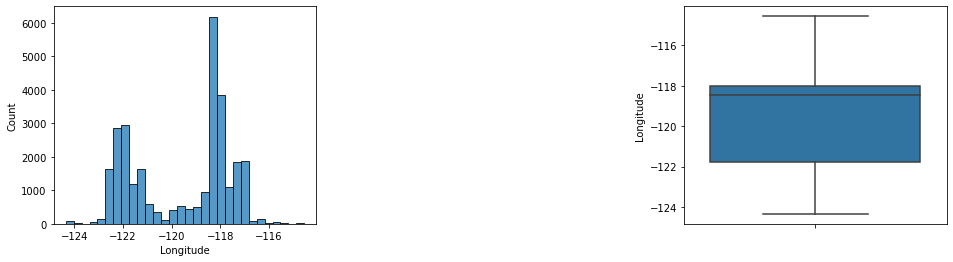

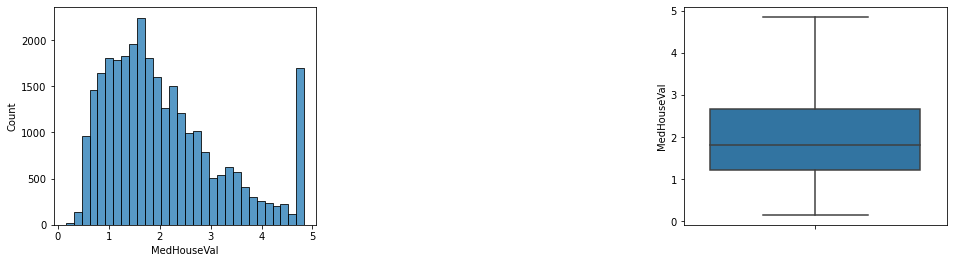

In [13]:
for col in ['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude','MedHouseVal']:
    diagnostic_plots(df, col)

In [14]:
# separating the data and labels
X = df.drop(['MedHouseVal','id'], axis=1)
Y = df['MedHouseVal']

In [15]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.35, random_state=0)

In [16]:
print(X_train.shape)
print(X_test.shape)

(19310, 8)
(10399, 8)


In [18]:
from sklearn.tree import DecisionTreeRegressor

In [19]:
regressor = DecisionTreeRegressor(random_state=0)

In [20]:
regressor.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=0)

In [21]:
pred2 = regressor.predict(X_test)

In [22]:
pred2

array([1.79 , 2.528, 1.875, ..., 1.037, 3.439, 1.615])

In [23]:
rmse = np.sqrt(MSE(Y_test, pred2))
print("RMSE : % f" %(rmse))

RMSE :  0.829728


In [24]:
xgb_model = XGBRegressor(objective ='reg:linear', n_estimators = 10, seed = 123)

In [25]:
xgb_model.fit(X_train, Y_train)

[19:53:19] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=10, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', predictor='auto', ...)

In [26]:
pred = xgb_model.predict(X_test)

In [27]:
pred

array([1.5576676, 2.42692  , 1.507313 , ..., 0.9570641, 3.279547 ,
       1.6483978], dtype=float32)

In [28]:
rmse = np.sqrt(MSE(Y_test, pred))
print("RMSE : % f" %(rmse))

RMSE :  0.596486


In [29]:
from sklearn.model_selection import cross_val_score
from bayes_opt import BayesianOptimization
import lightgbm as lgb
from lightgbm import LGBMRegressor
def lgb_cv(n_estimators, max_depth, num_leaves, subsample,colsample_bytree, data, targets):
    estimator = LGBMRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        num_leaves=num_leaves,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        random_state=121,
        class_weight='balanced'
    )
    cval = cross_val_score(estimator, data, targets,
                           scoring='neg_root_mean_squared_error', cv=3)
    return cval.mean()

def lgb_crossval(n_estimators, max_depth, num_leaves, subsample,colsample_bytree):
        return lgb_cv(
            n_estimators=int(n_estimators),
            max_depth=int(max_depth),
            num_leaves=int(num_leaves),
            subsample=max(min(subsample, 0.999), 1e-3),
            colsample_bytree=max(min(colsample_bytree, 0.999), 1e-3),
            data=X_train,
            targets=Y_train,
        )
        
optimizer = BayesianOptimization(
        f=lgb_crossval,
        pbounds={
            "n_estimators": (10, 250),
            "max_depth": (3,15),
            "num_leaves": (10, 30),
            "subsample": (0.1, 0.999),
            "colsample_bytree":(0.1, 0.999)
        },
        random_state=121,
        verbose=2
    )
optimizer.maximize(n_iter=15)

best_params = optimizer.max['params']
best_params['max_depth'] = int(best_params['max_depth'])
best_params['num_leaves'] = int(best_params['num_leaves'])
best_params['subsample'] = (best_params['subsample'])
best_params['colsample_bytree'] = (best_params['colsample_bytree'])
best_params['n_estimators'] = int(best_params['n_estimators'])

best_model = LGBMRegressor(random_state=121)
best_model.set_params(**best_params)
best_model.fit(X_train, Y_train)

|   iter    |  target   | colsam... | max_depth | n_esti... | num_le... | subsample |
-------------------------------------------------------------------------------------
| 1         | -0.6342   | 0.2001    | 5.529     | 65.91     | 13.04     | 0.8463    |
| 2         | -0.5872   | 0.4667    | 9.669     | 188.9     | 14.97     | 0.9708    |
| 3         | -0.6919   | 0.9565    | 8.878     | 14.39     | 27.15     | 0.464     |
| 4         | -0.588    | 0.6596    | 6.544     | 233.1     | 18.11     | 0.61      |
| 5         | -0.7282   | 0.3209    | 5.709     | 19.19     | 21.62     | 0.8455    |
| 6         | -0.5881   | 0.6334    | 5.988     | 233.1     | 19.27     | 0.4881    |
| 7         | -0.5907   | 0.999     | 15.0      | 209.6     | 30.0      | 0.999     |
| 8         | -0.5903   | 0.8386    | 15.0      | 153.5     | 30.0      | 0.362     |
| 9         | -0.6002   | 0.999     | 3.0       | 122.0     | 10.0      | 0.9557    |
| 10        | -0.6721   | 0.1       | 15.0      | 101.

LGBMRegressor(colsample_bytree=0.4667195539991278, max_depth=9,
              n_estimators=188, num_leaves=14, random_state=121,
              subsample=0.9708247999554284)

In [30]:
model = LGBMRegressor(colsample_bytree=0.4667195539991278, max_depth=9,
              n_estimators=188, num_leaves=14, random_state=121,
              subsample=0.9708247999554284)

In [31]:
model.fit(X_train, Y_train)

LGBMRegressor(colsample_bytree=0.4667195539991278, max_depth=9,
              n_estimators=188, num_leaves=14, random_state=121,
              subsample=0.9708247999554284)

In [32]:
y_pred = model.predict(X_test)

In [33]:
rmse = np.sqrt(MSE(Y_test, y_pred))
print("RMSE : % f" %(rmse))

RMSE :  0.563828


In [34]:
df1 = pd.read_csv('testing_data.csv')

In [35]:
df1

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,16148,2.2235,12.0,3.967700,1.177003,1457.0,3.633075,34.09,-117.30
1,7213,4.0484,26.0,6.776596,1.038298,1816.0,3.836257,34.28,-118.74
2,23067,2.3571,20.0,3.621701,1.074380,2919.0,1.554825,37.36,-121.89
3,28335,1.7552,30.0,2.342071,1.093834,1327.0,3.065442,34.05,-118.29
4,33439,2.5754,52.0,3.136150,1.166667,870.0,1.890476,37.78,-122.42
...,...,...,...,...,...,...,...,...,...
7423,1808,2.3798,19.0,2.936508,1.065476,2889.0,3.803681,33.97,-118.18
7424,20289,2.7417,11.0,4.983310,1.129222,3093.0,2.691131,34.96,-116.96
7425,9269,6.9257,23.0,6.889535,0.961783,835.0,3.123711,33.70,-118.07
7426,24959,10.0760,28.0,8.187817,1.015228,1510.0,2.522843,37.37,-122.33


In [36]:
house_id = df1.id

In [37]:
df1.drop('id', axis = 1, inplace=True)

In [38]:
test_pred = model.predict(df1)

In [39]:
test_pred

array([0.94147018, 1.8090017 , 2.17219248, ..., 3.24983349, 5.01486299,
       1.75244749])

In [40]:
df2 = pd.DataFrame({"house_id":house_id, "test_pred": test_pred})

In [41]:
df2.to_csv("Submission.csv",index=False)

In [42]:
df2

,house_id,test_pred
0,16148,0.941470
1,7213,1.809002
2,23067,2.172192
3,28335,1.623495
4,33439,2.480715
...,...,...
7423,1808,1.429098
7424,20289,0.768150
7425,9269,3.249833
7426,24959,5.014863
